# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [16]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [40]:
def euclidean_distance(Cluster_Centroids, Data_points):
    return np.linalg.norm(Data_points-Cluster_Centroids)
    
def pearson_correlation_distance(Cluster_Centroids, Data_points):
    correlation_coefficient = np.corrcoef(Cluster_Centroids, Data_points)[0, 1]
    distance = 1 - correlation_coefficient
    return distance   

def GUC_Distance( Cluster_Centroids, Data_points, Distance_Type ):
    num_points = Data_points.shape[0]
    num_centroids = Cluster_Centroids.shape[0]
    Cluster_Distance = np.zeros((num_points, num_centroids))
    for i, point in enumerate(Data_points):
        for j, centroid in enumerate(Cluster_Centroids):
            if Distance_Type == 'E':
                #print(point)
                distance = euclidean_distance(point, centroid)
                #print(centroid)
                #print(distance)
                Cluster_Distance[i, j] = distance
            else:
                distance = pearson_correlation_distance(point, centroid)
                Cluster_Distance[i, j] = distance
    print(Cluster_Distance)
    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [54]:
def assign_clusters(Cluster_Distance):
    assigned_clusters = np.argmin(Cluster_Distance, axis=1)
    min_distances = np.min(Cluster_Distance, axis=1)
    return assigned_clusters, min_distances

def calculate_mean_square_distance(Data_points, assigned_clusters, cluster_heads):
    num_clusters = len(cluster_heads)
    square_distances = np.zeros(num_clusters)
    for i in range(num_clusters):
        cluster_points = Data_points[assigned_clusters == i]
        centroid = cluster_heads[i]
        if len(cluster_points) > 0:
            x=np.sum(np.square(cluster_points - centroid) )
            print(x)
            square_distances[i] = x
    mean_square_distances=np.sum(square_distances)/Data_points.shape[0]
    return mean_square_distances

def kmeans(data_points, k, Distance_Type, tolerance=1e-4):
    def initialize_cluster_heads(data, k):
        num_features = data.shape[1]
        cluster_heads = np.zeros((k, num_features))                   
        minn = np.min(data, axis=0)
        maxx=np.max(data, axis=0)
        
        for i in range(k):
            cluster_heads[i] = data[np.random.randint(0, data.shape[0])]
        return cluster_heads

    cluster_heads = initialize_cluster_heads(data_points, k)
    i=0
    while(True):
        cluster_distances = GUC_Distance(cluster_heads, data_points,Distance_Type)
        assigned_clusters, _ = assign_clusters(cluster_distances)
        
        new_cluster_heads = np.array([np.mean(data_points[assigned_clusters == i], axis=0) for i in range(k)])
        if (np.linalg.norm(new_cluster_heads - cluster_heads) < tolerance):
            break
        cluster_heads=new_cluster_heads
        print(i)
        i=i+1
    return assigned_clusters, cluster_heads


def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    
    assigned_clusters, cluster_heads = kmeans(Data_points, Number_of_Clusters,Distance_Type)
    cluster_distances = GUC_Distance(cluster_heads, Data_points,Distance_Type)
    mean_square_distances = calculate_mean_square_distance(Data_points, assigned_clusters, cluster_heads)

    return cluster_distances, mean_square_distances,assigned_clusters

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [19]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [20]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,assigned_clusters=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[assigned_clusters==i,0],X[assigned_clusters==i,1],c = color[i],alpha = alpha,s=s)
            #plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

7.372496970649914
7.372496970649913
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


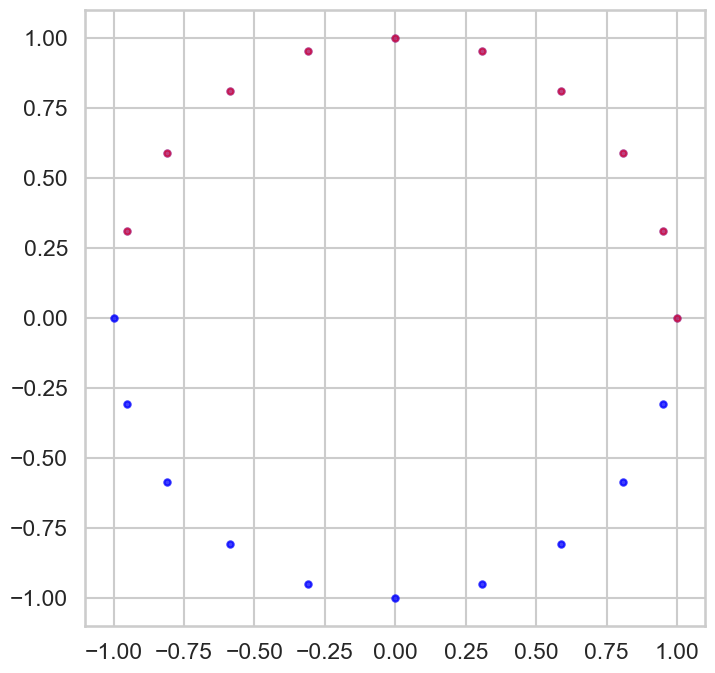

In [21]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)
distance,msd,clusters=GUC_Kmean(X,2,'E')
print(clusters)
display_cluster(X,clusters,2)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

[[11.69837139  8.81306433 14.7874115   9.17350652]
 [10.21621901  7.53492339 13.56033228  7.93385602]
 [12.16647105  9.38207573 15.38303412  9.75779201]
 ...
 [ 6.6863158   8.93542224  3.1390707   8.58271107]
 [ 5.65274665  7.3098409   1.28816162  6.91471788]
 [ 5.55029384  7.29454759  1.3026653   6.90699685]]
0
[[12.11737653  3.43095737 15.58810687  9.92677507]
 [10.74901613  2.1791946  14.31465633  8.74975077]
 [12.65133176  3.97632767 16.16667044 10.53393911]
 ...
 [ 5.73021518 14.33786885  2.20332213  7.90279685]
 [ 4.38998494 12.70177659  0.76838118  6.15480902]
 [ 4.31977081 12.69323158  0.6324857   6.16301265]]
1
[[12.43540847  1.98820436 16.38438221  8.80926333]
 [11.13109986  0.87931104 15.10770171  7.5720978 ]
 [12.99885191  2.51538551 16.9621221   9.39369341]
 ...
 [ 5.31512128 15.79902727  1.42881044  8.94599177]
 [ 3.78879862 14.15816393  0.69927914  7.27828662]
 [ 3.74480196 14.15116859  0.53140226  7.27105497]]
2
[[12.57315279  1.73845207 16.74803924  8.27831596]
 [11.29

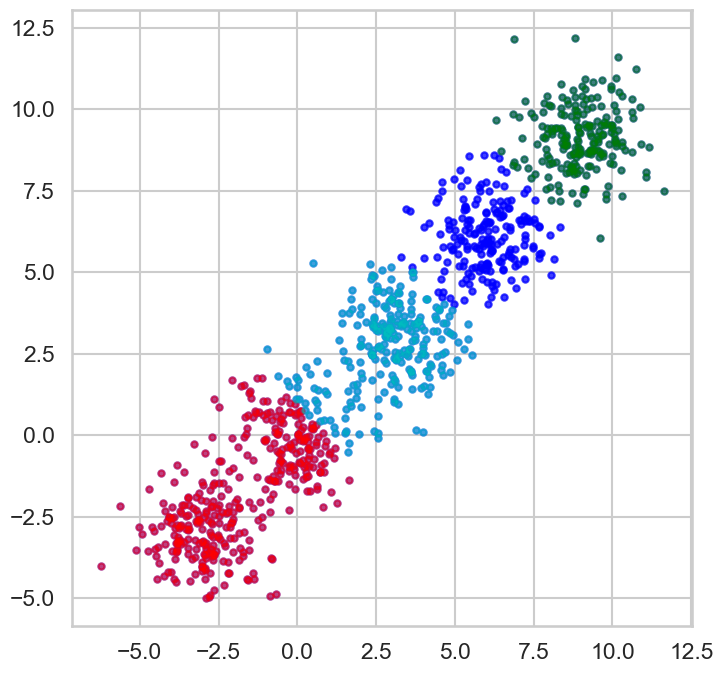

In [57]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
distance,msd,clusters=GUC_Kmean(X,4,'E')
print(clusters)
display_cluster(X,clusters,4)


#### 2.3. Example 3 : moons Data Gen and display 

[[1.79587558 1.3335757  1.0721216 ]
 [0.68214221 0.52443555 1.39477932]
 [0.39896276 0.47923317 1.13038094]
 ...
 [1.90150442 1.28944444 1.35779055]
 [0.74379014 0.68675048 1.53151004]
 [1.14447719 1.19604342 0.17817956]]
0
[[2.27790227 1.19227078 0.63952054]
 [0.75268949 0.68557891 1.50735368]
 [0.6304441  0.65592594 1.29843896]
 ...
 [2.34583399 1.12046211 0.94563868]
 [0.70081401 0.84546487 1.66286801]
 [1.63790049 1.18387623 0.39910011]]
1
[[2.27883139 1.3116624  0.55649069]
 [0.70926918 0.55142402 1.49159566]
 [0.60775271 0.51892112 1.29916181]
 ...
 [2.33588998 1.2575584  0.84463936]
 [0.64930469 0.71289506 1.64991324]
 [1.66314832 1.20679048 0.50174398]]
2
[[2.30094698 1.4176214  0.51487964]
 [0.73963022 0.43809241 1.49994191]
 [0.63592937 0.38901603 1.31484563]
 ...
 [2.36137762 1.38202043 0.79893102]
 [0.67868856 0.60086067 1.65927434]
 [1.67499673 1.22527416 0.54699647]]
3
[[2.36586771 1.46671375 0.49365718]
 [0.78859286 0.40512256 1.50481241]
 [0.69765799 0.28996075 1.323524

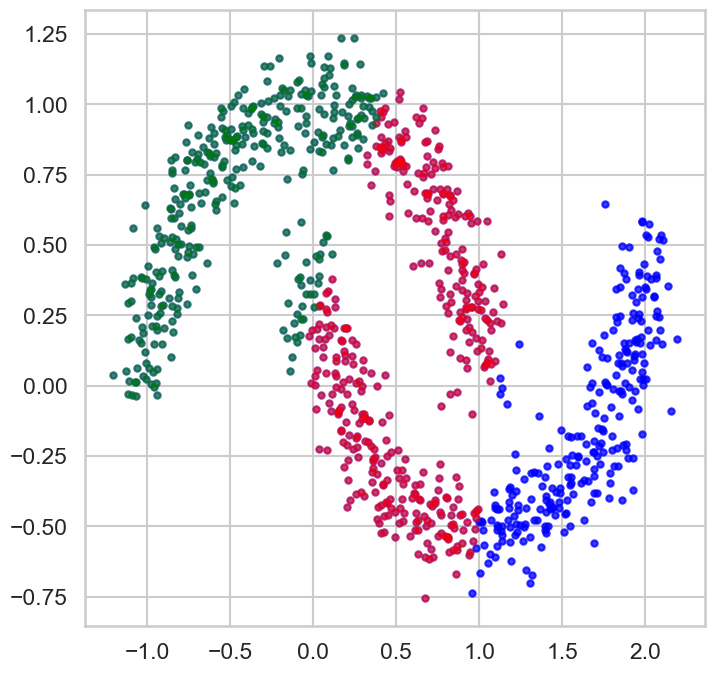

In [58]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)
distance,msd,clusters=GUC_Kmean(X,3,'E')
print(clusters)
display_cluster(X,clusters,3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

[[     0      0     67 ... 124670      1      2]
 [     1      1     22 ... 150773      1      2]
 [     0      0     49 ...  89210      0      0]
 ...
 [     0      0     31 ...  86400      0      0]
 [     1      1     24 ...  97968      0      0]
 [     0      0     25 ...  68416      0      0]]
[[4.93633576e-08]
 [2.62973887e-09]
 [5.50315443e-08]
 ...
 [1.06947122e-08]
 [6.23186613e-10]
 [1.16666358e-08]]
0
[[2.77251485e-08]
 [1.14191032e-08]
 [3.18982670e-08]
 ...
 [2.24212815e-09]
 [1.41853396e-09]
 [2.69936751e-09]]
[[2.77251485e-08]
 [1.14191032e-08]
 [3.18982670e-08]
 ...
 [2.24212815e-09]
 [1.41853396e-09]
 [2.69936751e-09]]
2903113032648.6436
[[2.13630080e-09 5.33625594e-08]
 [5.15083715e-08 1.80569915e-09]
 [3.51982443e-09 5.92226691e-08]
 ...
 [5.43142786e-09 1.25652240e-08]
 [2.47593118e-08 1.02576614e-09]
 [4.78154660e-09 1.36187026e-08]]
0
[[5.47870627e-09 4.24387400e-08]
 [3.99154028e-08 4.53536009e-09]
 [7.33409478e-09 4.75983404e-08]
 ...
 [2.11528328e-09 7.54108576

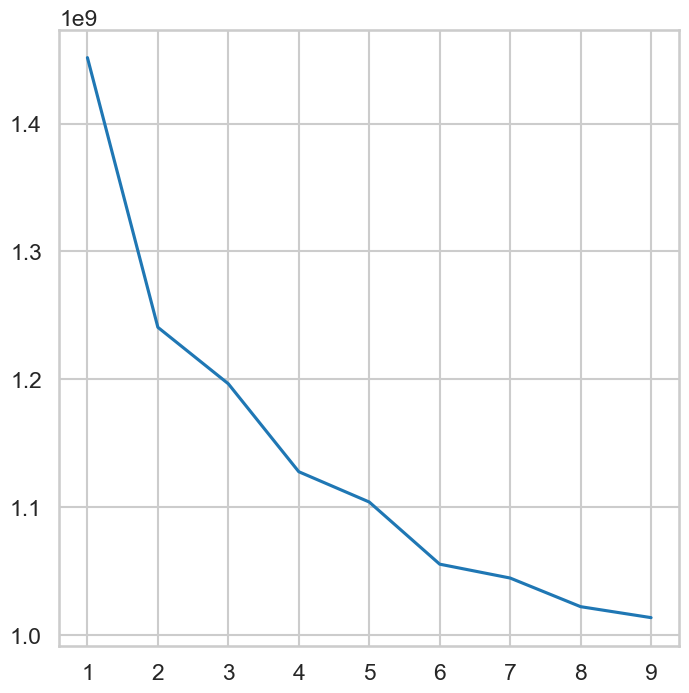

In [61]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/Users/claramagdy/Desktop/Ml/Ass1/Customer data.csv'

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_file_path)
df = df.drop('ID', axis=1)
# Display the DataFrame

print(df.to_numpy())
all_mse=[]
x=np.arange(1,10)
for i in range(1,10):
  Distance,mse,assigned=GUC_Kmean(df.to_numpy(),i,'P')
  all_mse.append(mse)
plt.plot(x,all_mse)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

[[     0      0     67 ... 124670      1      2]
 [     1      1     22 ... 150773      1      2]
 [     0      0     49 ...  89210      0      0]
 ...
 [     0      0     31 ...  86400      0      0]
 [     1      1     24 ...  97968      0      0]
 [     0      0     25 ...  68416      0      0]]
[[19064.01515946]
 [ 7039.0315385 ]
 [54524.00034847]
 ...
 [57334.00128196]
 [45766.00398768]
 [75318.0021708 ]]
0
[[ 3715.71148297]
 [29818.58428044]
 [31744.42172543]
 ...
 [34554.41938829]
 [22986.42212309]
 [52538.4201586 ]]
[[ 3715.71148297]
 [29818.58428044]
 [31744.42172543]
 ...
 [34554.41938829]
 [22986.42212309]
 [52538.4201586 ]]
2903113032648.6436
[[ 3153.09165741 47138.01540158]
 [29256.00758819 73241.00036865]
 [32307.00058811 11678.01721184]
 ...
 [35117.002093    8868.00039468]
 [23549.0077498  20436.00061167]
 [53101.00307904  9116.00104212]]
0
[[11076.30927727 43506.21896402]
 [15026.73837422 69609.20554176]
 [46536.27102515  8046.22286094]
 ...
 [49346.26999474  5236.2050

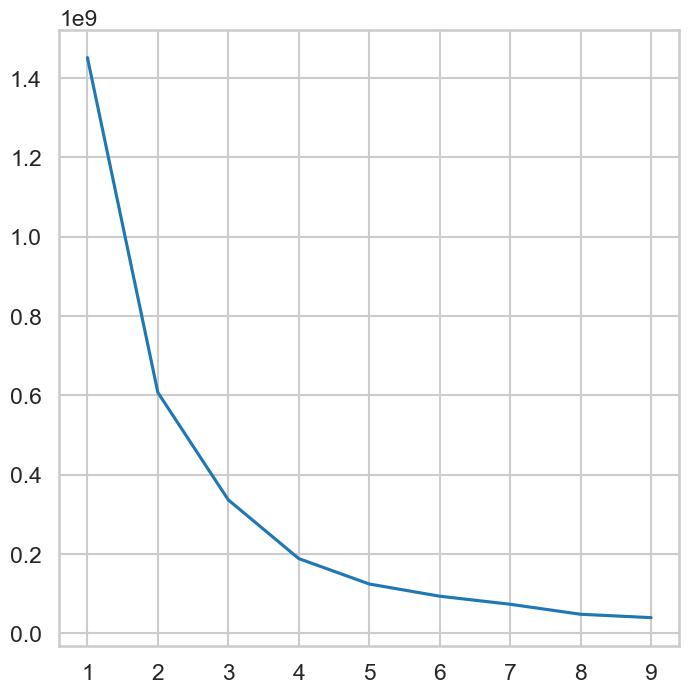

In [60]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/Users/claramagdy/Desktop/Ml/Ass1/Customer data.csv'

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(csv_file_path)
df = df.drop('ID', axis=1)
# Display the DataFrame

print(df.to_numpy())
all_mse=[]
x=np.arange(1,10)
for i in range(1,10):
  Distance,mse,assigned=GUC_Kmean(df.to_numpy(),i,'E')
  all_mse.append(mse)
plt.plot(x,all_mse)